In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

Un grafo aleatorio G(N,p) es un grafo no dirigido con N nodos donde cada par de nodos está conectado aleatoriamente con una probabilidad prefijada p.

### Inciso (a)

El número de triángulos de un grafo aleatorio del ensamble G(N,p) está dado por  $ num.triangulos  = \frac{1}{6}N(N-1)(N-2)p^{3}$.
Aplicando el límite $N>>1$ la cantidad de triangulos formados en la red termina pareciendose a $ num.triangulos  \sim \frac{1}{6}(N-1)^{3}p^{3} = \frac{1}{6}((N-1)p)^{3}$. Este límite es válido ya que el límite $ \lim_{(N >> 1)} \frac{(N-1)^{3}}{N(N-1)(N-2)}$ converge a 1, probando que tienden a la misma velocidad.

Por otro lado, el grado medio viene definido como $<k> = c = (N-1)p$. Reemplazando en el límite anterior nos termina quedando que $ cant. triangulos \sim \frac{1}{6}c^{3}$. Se puede ver que este número es independiente al tamaño de la red.


### Inciso (b)
La cantidad de tripletes de esta clase de red es $num.tripletes = \frac{1}{2}N(N-1)(N-2)p^{2} $. Una vez más, su límite cuando N>>1 lo puedo reacomodar como  $ num.triangulos \xrightarrow{N>>1}  \frac{1}{6}N(N-1)^{2}p^{3}$ pues $ \lim_{(N >> 1)} \frac{N(N-1)^{2}}{N(N-1)(N-2)} = 1$.

Por ende tenemos que $num.tripletes \sim \frac{1}{2}N(N-1)^{2}p^{2} = \frac{1}{2}N((N-1)p)^{2} $. 
Aplicando que $<k> = c = (N-1)p$ nos termina quedando que $num.tripletes = \frac{Nc^{2}}{2}$.

### Inciso (c)

Por definicion tenemos que el Coeficiente de Clustering es $C = \frac{c}{N} = p \frac{N-1}{N}$.
    Podemos ver que el limite de $\frac{N-1}{N}$ cuando N>>1 resulta ser 1. Entonces concluímos que para esta aproximación $C = p$.

## Ejercicio 2
Este ejercico tiene como objetivo visualizar tres redes del ensemble G(N,p) con N=500 nodos y un grado medio de $<k>=0.8$ , $<k>=1$ y $<k>=8$ respectivamente.
    
En las redes de ensamble G(N,p) sabemos que $ <k> = (N-1)p $ . Por ende tenemos que la probabilidad de que un par de nodos se enlace es:
 $ p = \frac{<k>}{N-1}$.
Para cada red tendriamos que: 
* $p_{1} =  \frac{0.8}{500-1} = 0.0016$
* $p_{2} =  \frac{1}{500-1} = 0.002$
* $p_{3} =  \frac{8}{500-1} = 0.016$

In [8]:
#funcion que me enlaza pares segun la probabilidad p
def enlaces(n,p):
    edges = []
    #Itero sobre los pares i-j
    for i in range(n):
        for j in range(i+1,n):
            enlazar = [True,False]
            decision = np.random.choice(enlazar,1,p=[p,1-p])
            if decision:
                edges.append((i,j))
    return(edges)

#funcion que devuelve la red de ensamble G(n,p) 
def G(n,p):
    Red=nx.Graph()
    lista_nodos = np.arange(n)
    lista_enlaces = enlaces(n,p)
    Red.add_nodes_from(lista_nodos)
    Red.add_edges_from(lista_enlaces)
    return Red
    


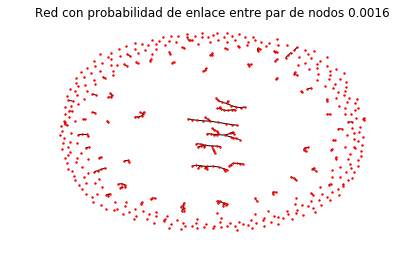

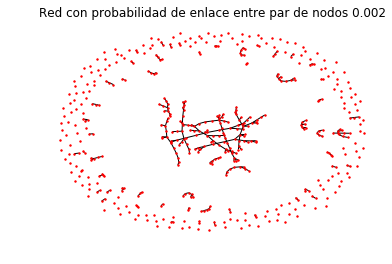

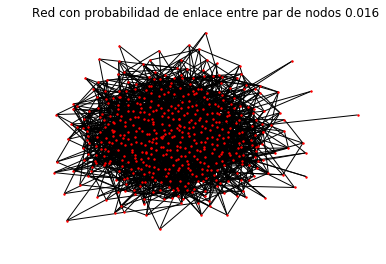

In [15]:
#grafico las tres redes con p1,p2 y p3
p = [0.0016,0.002,0.016]

for i,prob in enumerate(p):
    plt.title(f"Red con probabilidad de enlace entre par de nodos {prob}")
    nx.draw(G(500,prob),node_size=2)
    plt.show()